In [25]:
import yfinance as yf
import pandas as pd

# Download Apple stock data from Jan 1, 2018 to July 25, 2025
data = yf.download('AAPL', start='2018-01-01', end='2025-07-25')

# Reset index so 'Date' becomes a column
data = data.reset_index()

# Keep only relevant columns
data = data[['Date', 'Close', 'Volume']]

# Check the data
print(data.head())
print(data.isnull().sum())

/var/folders/fc/yqw59bzj6m5460kmpq8p0_nc0000gn/T/ipykernel_87798/3994123736.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2018-01-01', end='2025-07-25')
[*********************100%***********************]  1 of 1 completed

Price        Date      Close     Volume
Ticker                  AAPL       AAPL
0      2018-01-02  40.426819  102223600
1      2018-01-03  40.419788  118071600
2      2018-01-04  40.607529   89738400
3      2018-01-05  41.069859   94640000
4      2018-01-08  40.917332   82271200
Price   Ticker
Date              0
Close   AAPL      0
Volume  AAPL      0
dtype: int64


In [26]:
# Flatten multi-index columns if necessary
data.columns = [col if isinstance(col, str) else col[0] for col in data.columns]

# Rename columns to lowercase for consistency
data.columns = ['Date', 'Close', 'Volume']

# Ensure correct data types
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Final check
print(data.dtypes)
print(data.head())

Date      datetime64[ns]
Close            float64
Volume             int64
dtype: object
        Date      Close     Volume
0 2018-01-02  40.426819  102223600
1 2018-01-03  40.419788  118071600
2 2018-01-04  40.607529   89738400
3 2018-01-05  41.069859   94640000
4 2018-01-08  40.917332   82271200


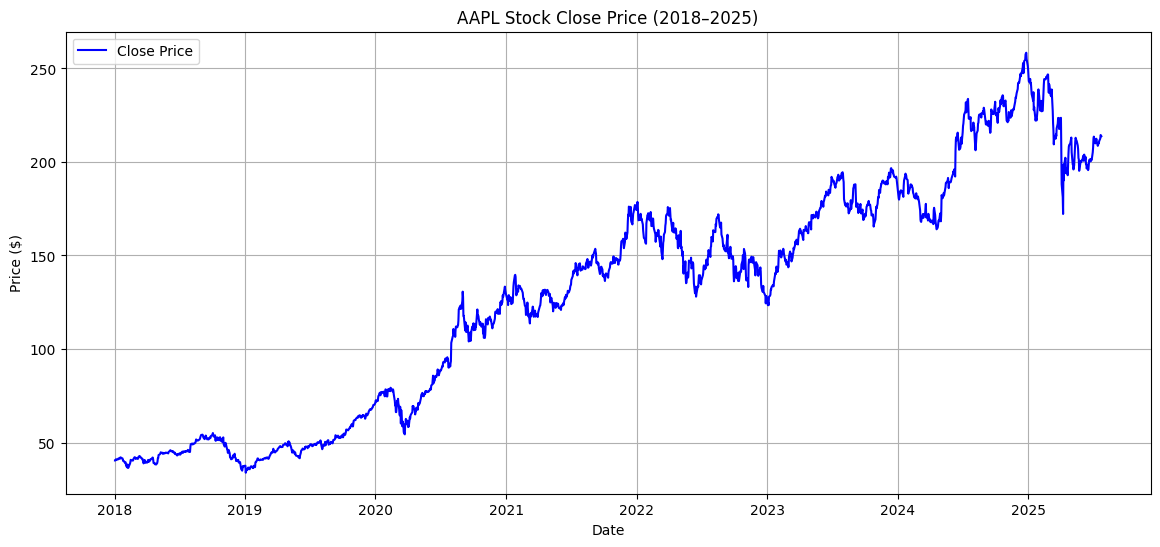

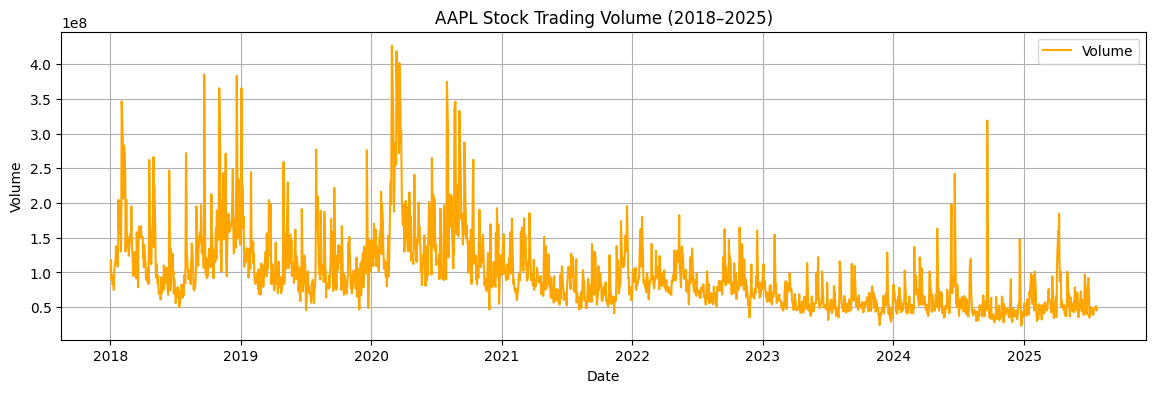

In [29]:
import matplotlib.pyplot as plt

# Plot Close price over time
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('AAPL Stock Close Price (2018–2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Volume over time
plt.figure(figsize=(14, 4))
plt.plot(data['Date'], data['Volume'], label='Volume', color='orange')
plt.title('AAPL Stock Trading Volume (2018–2025)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on the Close price
adf_result = adfuller(data['Close'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: -0.8997755635765214
p-value: 0.7880463188221669
Critical Value (1%): -3.433805504046101
Critical Value (5%): -2.8630664092088716
Critical Value (10%): -2.5675826028083906


In [31]:
# First-order differencing
data['Close_diff'] = data['Close'].diff()

# Drop the first row with NaN
data_diff = data.dropna()

# ADF test on differenced series
adf_diff = adfuller(data_diff['Close_diff'])

print("ADF Statistic (Differenced):", adf_diff[0])
print("p-value (Differenced):", adf_diff[1])
for key, value in adf_diff[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic (Differenced): -23.042915527344682
p-value (Differenced): 0.0
Critical Value (1%): -3.433805504046101
Critical Value (5%): -2.8630664092088716
Critical Value (10%): -2.5675826028083906


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1900
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4492.062
Date:                Mon, 28 Jul 2025   AIC                           8990.123
Time:                        12:08:27   BIC                           9006.770
Sample:                             0   HQIC                          8996.252
                               - 1900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0011      7.831     -0.000      1.000     -15.349      15.347
ma.L1         -0.0008      7.830  -9.97e-05      1.000     -15.348      15.346
sigma2         6.6400      0.089     74.207      0.0

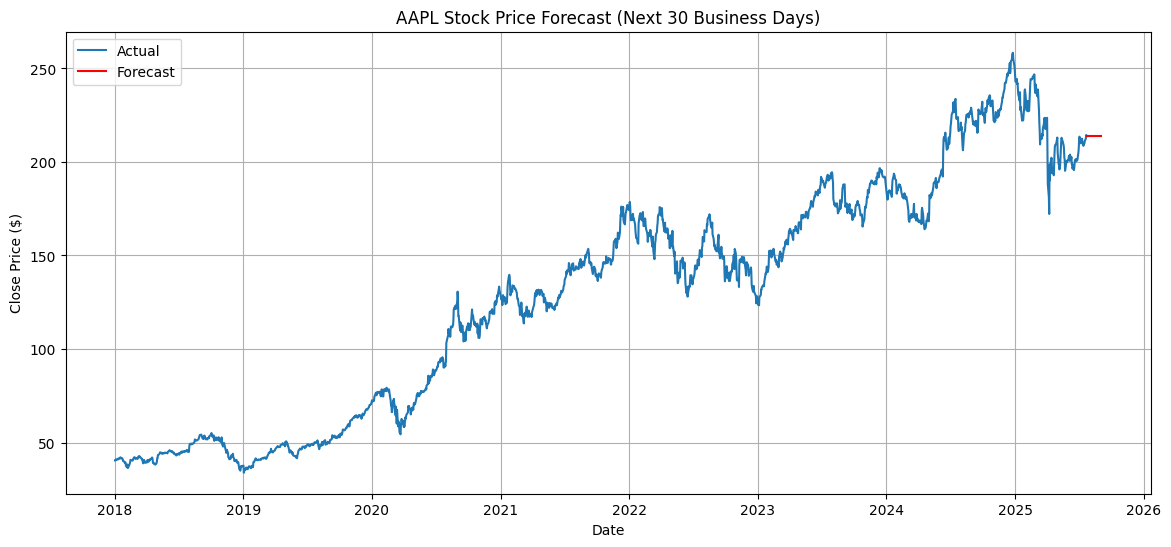

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA(1,1,1) model
model = ARIMA(data['Close'], order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Actual')
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=30, freq='B'), forecast, label='Forecast', color='red')
plt.title('AAPL Stock Price Forecast (Next 30 Business Days)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/40/e5/78afab229ccdaf6b947036440799dbdf88e2cd632e2f96b81f32de8aa05a/pmdarima-2.0.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/bb/c8/91b00bc68effba9ba1ff5b33988052ac4d98fc1ac3021ade7261661299c6/cython-3.1.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8985.746, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8987.727, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8987.728, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8986.130, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8988.831, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.400 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1900
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4490.873
Date:                Mon, 28 Jul 2025   AIC                           8985.746
Time:                        12:09:41   BIC                           8996.844
Sample:                             0   HQIC                          8989.831
                               - 1900                                       

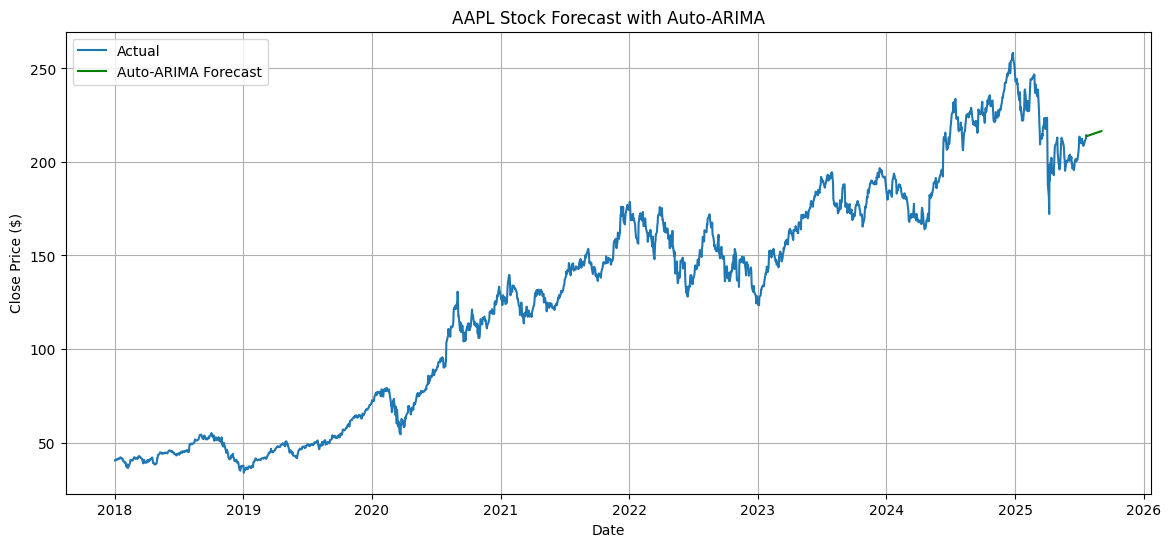

In [35]:
from pmdarima import auto_arima

# Fit auto_arima on Close price
auto_model = auto_arima(
    data['Close'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=1, seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Summary of the best model
print(auto_model.summary())

# Forecast next 30 days
forecast_auto = auto_model.predict(n_periods=30)

# Plot
plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Close'], label='Actual')
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=30, freq='B'),
         forecast_auto, label='Auto-ARIMA Forecast', color='green')
plt.title('AAPL Stock Forecast with Auto-ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()
plt.show()

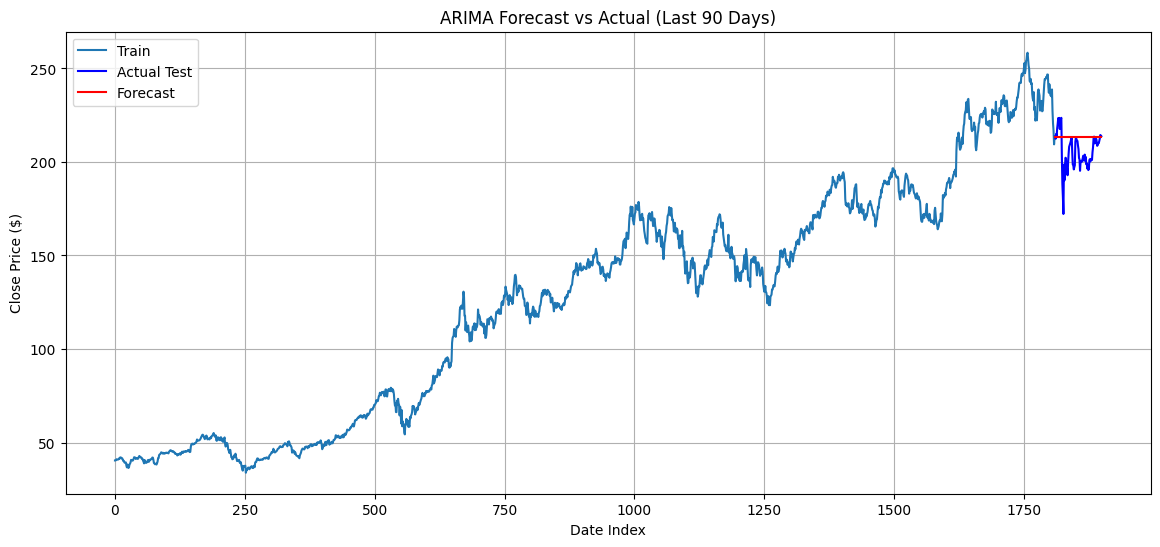

In [36]:
# Train-test split (last 90 days as test)
train = data['Close'][:-90]
test = data['Close'][-90:]

# Fit model on training data
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()

# Forecast next 90 points
forecast = model_fit.forecast(steps=90)

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Last 90 Days)')
plt.xlabel('Date Index')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compare forecast vs actual
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 11.88
MAE: 9.35


In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only 'Close' price
close_data = data[['Close']].values

# Scale data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

# Create sequences of 60 timesteps (e.g., 60 days) to predict the next day
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Final shape check
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1840, 60, 1)
y shape: (1840, 1)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
52/52 [==============================] - 2s 24ms/step - loss: 0.0230 - val_loss: 0.0025
Epoch 2/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 3/20
52/52 [==============================] - 1s 17ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 4/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 5/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 6/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 7/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 8/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 11/

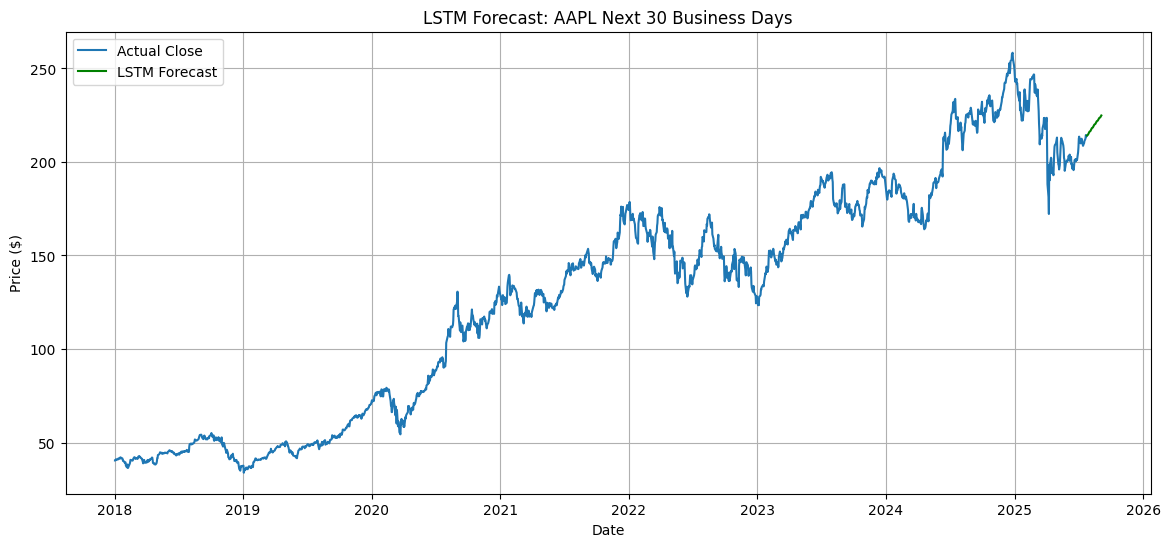

In [42]:
# Start with last 60 known days
# Start with last 60 known days
n_days = 30
input_seq = scaled_data[-60:].reshape(1, 60, 1)
predictions = []

for _ in range(n_days):
    next_pred = model.predict(input_seq, verbose=0)
    predictions.append(next_pred[0][0])
    # Corrected append step
    input_seq = np.append(input_seq[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Inverse transform to original scale
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create date range for plotting
import pandas as pd
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=n_days+1, freq='B')[1:]

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Close'], label='Actual Close')
plt.plot(future_dates, predicted_prices, label='LSTM Forecast', color='green')
plt.title('LSTM Forecast: AAPL Next 30 Business Days')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()